In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# Assigning the main folder of Dataset:
os.chdir('/content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Dataset')
cur_path = os.getcwd()
cur_path

'/content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Dataset'

## Install necessary dependencies

In [3]:
!pip install -U -q "tf-models-official"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.9 MB/s eta 0:00:00


## Import required libraries

In [4]:
import os
import io
import pprint
import tempfile
import matplotlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from six import BytesIO
from IPython import display
from urllib.request import urlopen

## Import required libraries from tensorflow models

In [5]:
import orbit
import tensorflow_models as tfm

from official.core import exp_factory
from official.core import config_definitions as cfg
from official.vision.serving import export_saved_model_lib
from official.vision.ops.preprocess_ops import normalize_image
from official.vision.ops.preprocess_ops import resize_and_crop_image
from official.vision.utils.object_detection import visualization_utils
from official.vision.dataloaders.tf_example_decoder import TfExampleDecoder

pp = pprint.PrettyPrinter(indent=4) # Set Pretty Print Indentation
print(tf.__version__) # Check the version of tensorflow used

%matplotlib inline

2.15.0


In [6]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.22.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.1.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorama==0.4.6
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.17.3
cupy-

## STEPS TO CREATE THE FOLDER SUCH AS MODELS, PRETRAINED-MODELS and EXPORTED-MODELS:

## CREATE THE TFRECORDS OF TRAIN, VALID AND TEST DATASET:

In [ ]:
TRAIN_DATA_DIR='./"COCO Format Dataset"/train'
TRAIN_ANNOTATION_FILE_DIR= './"COCO Format Dataset"/train/_annotations.coco.json'
OUTPUT_TFRECORD_TRAIN='../training_helper_directory/annotations/train'

!python -m official.vision.data.create_coco_tf_record --logtostderr --image_dir={TRAIN_DATA_DIR} --object_annotations_file={TRAIN_ANNOTATION_FILE_DIR} --output_file_prefix={OUTPUT_TFRECORD_TRAIN} --num_shards=1

2024-03-07 06:00:47.939186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 06:00:47.939264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 06:00:47.941084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 06:00:50.849953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0307 06:00:56.752405 139171239133184 create_coco_tf_record.py:502] writing to output path: ../training_helper_directory/annotations/train
I0307 06:01:23.288027 139171239133184 create_coco_tf_record.py:374] Building bounding box index.
I0307

In [ ]:
VALID_DATA_DIR='./"COCO Format Dataset"/valid'
VALID_ANNOTATION_FILE_DIR='./"COCO Format Dataset"/valid/_annotations.coco.json'
OUTPUT_TFRECORD_VALID='../training_helper_directory/annotations/valid'

!python -m official.vision.data.create_coco_tf_record --logtostderr \
  --image_dir={VALID_DATA_DIR} \
  --object_annotations_file={VALID_ANNOTATION_FILE_DIR} \
  --output_file_prefix={OUTPUT_TFRECORD_VALID} \
  --num_shards=1

2024-03-07 06:26:55.727334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 06:26:55.727407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 06:26:55.729029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 06:26:57.774376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0307 06:27:06.209440 134868562919424 create_coco_tf_record.py:502] writing to output path: ../training_helper_directory/annotations/valid
I0307 06:27:08.828471 134868562919424 create_coco_tf_record.py:374] Building bounding box index.
I0307

In [ ]:
TEST_DATA_DIR='./"COCO Format Dataset"/test'
TEST_ANNOTATION_FILE_DIR='./"COCO Format Dataset"/test/_annotations.coco.json'
OUTPUT_TFRECORD_TEST='../training_helper_directory/annotations/test'

!python -m official.vision.data.create_coco_tf_record --logtostderr \
  --image_dir={TEST_DATA_DIR} \
  --object_annotations_file={TEST_ANNOTATION_FILE_DIR} \
  --output_file_prefix={OUTPUT_TFRECORD_TEST} \
  --num_shards=1

2024-03-07 06:28:59.534479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 06:28:59.534576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 06:28:59.537354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 06:29:01.066573: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0307 06:29:05.927066 132777796747264 create_coco_tf_record.py:502] writing to output path: ../training_helper_directory/annotations/test
I0307 06:29:10.693518 132777796747264 create_coco_tf_record.py:374] Building bounding box index.
I0307 

## DEFINING PATHS FOR THE PROJECT:

In [7]:
train_data_input_path ='../training_helper_directory/annotations/train-00000-of-00001.tfrecord'
valid_data_input_path ='../training_helper_directory/annotations/valid-00000-of-00001.tfrecord'
test_data_input_path ='../training_helper_directory/annotations/test-00000-of-00001.tfrecord'
model_dir = '/content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Retinanet Mobile COCO/models/retinanet_mobile_coco'
export_dir = '/content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Retinanet Mobile COCO/exported-models/my-model'

## GETTING THE MODELS:

In [8]:
exp_config = exp_factory.get_exp_config('retinanet_mobile_coco')

## MODIFYING THE PARAMETERS JUST LIKE THE PIPELINE CONFIG IN THE PREVIOUS CODE:

In [9]:
batch_size = 6
num_classes = 56

HEIGHT, WIDTH = 640, 640
IMG_SIZE = [HEIGHT, WIDTH, 3]

# Backbone config.
exp_config.task.freeze_backbone = False
exp_config.task.annotation_file = ''

# Model config.
exp_config.task.model.input_size = IMG_SIZE
exp_config.task.model.num_classes = num_classes + 1
exp_config.task.model.detection_generator.tflite_post_processing.max_classes_per_detection = exp_config.task.model.num_classes

# Training data config.
exp_config.task.train_data.input_path = train_data_input_path
exp_config.task.train_data.dtype = 'float32'
exp_config.task.train_data.global_batch_size = batch_size
exp_config.task.train_data.parser.aug_scale_max = 1.0
exp_config.task.train_data.parser.aug_scale_min = 1.0

# Validation data config.
exp_config.task.validation_data.input_path = valid_data_input_path
exp_config.task.validation_data.dtype = 'float32'
exp_config.task.validation_data.global_batch_size = batch_size

## Adjust the trainer configuration.

In [10]:
logical_device_names = [logical_device.name for logical_device in tf.config.list_logical_devices()]

if 'GPU' in ''.join(logical_device_names):
  print('This may be broken in Colab.')
  device = 'GPU'
elif 'TPU' in ''.join(logical_device_names):
  print('This may be broken in Colab.')
  device = 'TPU'
else:
  print('Running on CPU is slow, so only train for a few steps.')
  device = 'CPU'


train_steps = 2000
exp_config.trainer.steps_per_loop = 10 # steps_per_loop = num_of_training_examples // train_batch_size

exp_config.trainer.summary_interval = 10
exp_config.trainer.checkpoint_interval = 10
exp_config.trainer.validation_interval = 10
exp_config.trainer.validation_steps =  10 # validation_steps = num_of_validation_examples // eval_batch_size
exp_config.trainer.train_steps = train_steps
exp_config.trainer.optimizer_config.warmup.linear.warmup_steps = 10
exp_config.trainer.optimizer_config.learning_rate.type = 'cosine'
exp_config.trainer.optimizer_config.learning_rate.cosine.decay_steps = train_steps
exp_config.trainer.optimizer_config.learning_rate.cosine.initial_learning_rate = 0.1
exp_config.trainer.optimizer_config.warmup.linear.warmup_learning_rate = 0.05

This may be broken in Colab.


## Print the modified configuration.

In [11]:
pp.pprint(exp_config.as_dict())
display.Javascript('google.colab.output.setIframeHeight("500px");')

{   'runtime': {   'all_reduce_alg': None,
                   'batchnorm_spatial_persistent': False,
                   'dataset_num_private_threads': None,
                   'default_shard_dim': -1,
                   'distribution_strategy': 'mirrored',
                   'enable_xla': False,
                   'gpu_thread_mode': None,
                   'loss_scale': None,
                   'mixed_precision_dtype': 'float32',
                   'num_cores_per_replica': 1,
                   'num_gpus': 0,
                   'num_packs': 1,
                   'per_gpu_thread_count': 0,
                   'run_eagerly': False,
                   'task_index': -1,
                   'tpu': None,
                   'tpu_enable_xla_dynamic_padder': None,
                   'use_tpu_mp_strategy': False,
                   'worker_hosts': None},
    'task': {   'allow_image_summary': False,
                'annotation_file': '',
                'differential_privacy_config': None,
      

<IPython.core.display.Javascript object>

## SETTING THE MIXED PRECISION POLICY SUCH AS FLOAT16 FOR FASTER PREPROCESSING:

## Set up the distribution strategy.

In [12]:
if exp_config.runtime.mixed_precision_dtype == tf.float16:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')

if 'GPU' in ''.join(logical_device_names):
  distribution_strategy = tf.distribute.MirroredStrategy()
elif 'TPU' in ''.join(logical_device_names):
  tf.tpu.experimental.initialize_tpu_system()
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='/device:TPU_SYSTEM:0')
  distribution_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
  print('Warning: this will be really slow.')
  distribution_strategy = tf.distribute.OneDeviceStrategy(logical_device_names[0])

print('Done')

Done


## Create the `Task` object (`tfm.core.base_task.Task`) from the `config_definitions.TaskConfig`.

The `Task` object has all the methods necessary for building the dataset, building the model, and running training & evaluation. These methods are driven by `tfm.core.train_lib.run_experiment`.

In [13]:
with distribution_strategy.scope():
  task = tfm.core.task_factory.get_task(exp_config.task, logging_dir=model_dir)

## Visualize a batch of the data.

In [14]:
for images, labels in task.build_inputs(exp_config.task.train_data).take(1):
  print()
  print(f'images.shape: {str(images.shape):16}  images.dtype: {images.dtype!r}')
  print(f'labels.keys: {labels.keys()}')


images.shape: (6, 640, 640, 3)  images.dtype: tf.float32
labels.keys: dict_keys(['cls_targets', 'box_targets', 'anchor_boxes', 'cls_weights', 'box_weights', 'image_info'])


## Create category index dictionary to map the labels to corresponding label names.

In [15]:
category_index={
1: {
    'id': 1,
    'name': 'all motor vehicle prohibited'
},
2: {
    'id': 2,
    'name': 'axle load limit'
},
3: {
    'id': 3,
    'name': 'compulsary ahead'
},
4: {
    'id': 4,
    'name': 'compulsary keep left'
},
5: {
    'id': 5,
    'name': 'compulsary keep right'
},
6: {
    'id': 6,
    'name': 'compulsary turn left ahead'
},
7: {
    'id': 7,
    'name': 'compulsary turn right ahead'
},
8: {
    'id': 8,
    'name': 'cross road'
},
9: {
    'id': 9,
    'name': 'dangerous dip'
},
10: {
    'id': 10,
    'name': 'falling rocks'
},
11: {
    'id': 11,
    'name': 'gap in median'
},
12: {
    'id': 12,
    'name': 'give way'
},
13: {
    'id': 13,
    'name': 'guarded level crossing'
},
14: {
    'id': 14,
    'name': 'height limit'
},
15: {
    'id': 15,
    'name': 'horn prohibited'
},
16: {
    'id': 16,
    'name': 'hospital ahead'
},
17: {
    'id': 17,
    'name': 'hump or rough road'
},
18: {
    'id': 18,
    'name': 'left hand curve'
},
19: {
    'id': 19,
    'name': 'left reverse bend'
},
20: {
    'id': 20,
    'name': 'left turn prohibited'
},
21: {
    'id': 21,
    'name': 'loose gravel'
},
22: {
    'id': 22,
    'name': 'men at work'
},
23: {
    'id': 23,
    'name': 'narrow bridge ahead'
},
24: {
    'id': 24,
    'name': 'narrow road ahead'
},
25: {
    'id': 25,
    'name': 'no entry'
},
26: {
    'id': 26,
    'name': 'no parking'
},
27: {
    'id': 27,
    'name': 'no stopping or standing'
},
28: {
    'id': 28,
    'name': 'overtaking prohibited'
},
29: {
    'id': 29,
    'name': 'pass either side'
},
30: {
    'id': 30,
    'name': 'pedestrian crossing'
},
31: {
    'id': 31,
    'name': 'petrol pump ahead'
},
32: {
    'id': 32,
    'name': 'quay side or river bank'
},
33: {
    'id': 33,
    'name': 'restriction ends'
},
34: {
    'id': 34,
    'name': 'right hand curve'
},
35: {
    'id': 35,
    'name': 'right reverse bend'
},
36: {
    'id': 36,
    'name':'right turn prohibited'
},
37: {
    'id': 37,
    'name': 'road widens ahead'
},
38: {
    'id': 38,
    'name': 'roundabout'
},
39: {
    'id': 39,
    'name': 'school ahead'
},
40: {
    'id': 40,
    'name': 'side road left'
},
41: {
    'id': 41,
    'name': 'side road right'
},
42: {
    'id': 42,
    'name': 'slippery road'
},
43: {
    'id': 43,
    'name': 'speed limit 100'
},
44: {
    'id': 44,
    'name': 'speed limit 30'
},
45: {
    'id': 45,
    'name': 'speed limit 50'
},
46: {
    'id': 46,
    'name': 'staggered intersection'
},
47: {
    'id': 47,
    'name': 'steep ascent'
},
48: {
    'id': 48,
    'name': 'steep descent'
},
49: {
    'id': 49,
    'name': 'stop'
},
50: {
    'id': 50,
    'name': 'straight prohibited'
},
51: {
    'id': 51,
    'name': 't intersection'
},
52: {
    'id': 52,
    'name': 'u turn'
},
53: {
    'id': 53,
    'name': 'u turn prohibited'
},
54: {
    'id': 54,
    'name': 'unguarded level crossing'
},
55: {
    'id': 55,
    'name': 'width limit'
},
56: {
    'id': 56,
    'name': 'y intersection'
}
}
tf_ex_decoder = TfExampleDecoder()

## Helper function for visualizing the results from TFRecords.
Use `visualize_boxes_and_labels_on_image_array` from `visualization_utils` to draw boudning boxes on the image.

In [16]:
def show_batch(raw_records, num_of_examples):
  plt.figure(figsize=(20, 20))
  use_normalized_coordinates=True
  min_score_thresh = 0.30
  for i, serialized_example in enumerate(raw_records):
    plt.subplot(1, 3, i + 1)
    decoded_tensors = tf_ex_decoder.decode(serialized_example)
    image = decoded_tensors['image'].numpy().astype('uint8')
    scores = np.ones(shape=(len(decoded_tensors['groundtruth_boxes'])))
    visualization_utils.visualize_boxes_and_labels_on_image_array(
        image,
        decoded_tensors['groundtruth_boxes'].numpy(),
        decoded_tensors['groundtruth_classes'].numpy().astype('int'),
        scores,
        category_index=category_index,
        use_normalized_coordinates=use_normalized_coordinates,
        max_boxes_to_draw=200,
        min_score_thresh=min_score_thresh,
        agnostic_mode=False,
        instance_masks=None,
        line_thickness=4)

    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Image-{i+1}')
  plt.show()

### Visualization of train data

The bounding box detection has two components
  1. Class label of the object detected (e.g.RBC)
  2. Percentage of match between predicted and ground truth bounding boxes.

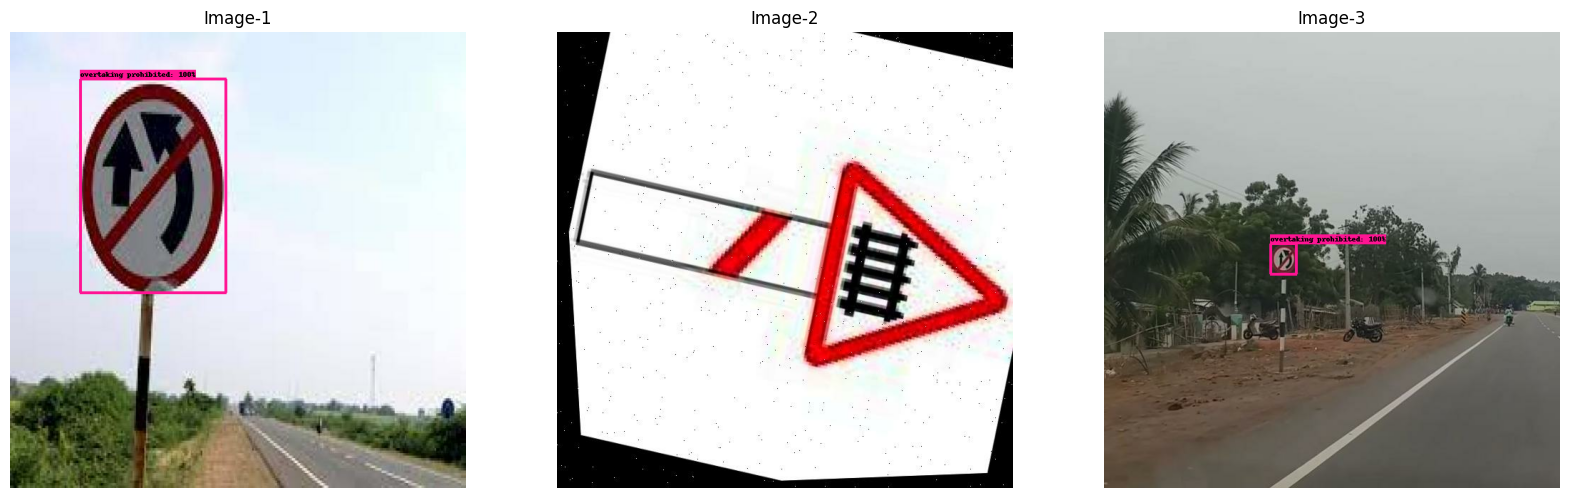

In [17]:
buffer_size = 20
num_of_examples = 3

raw_records = tf.data.TFRecordDataset(
    exp_config.task.train_data.input_path).shuffle(
        buffer_size=buffer_size).take(num_of_examples)
show_batch(raw_records, num_of_examples)

## Train and evaluate.

We follow the COCO challenge tradition to evaluate the accuracy of object detection based on mAP(mean Average Precision). Please check [here](https://cocodataset.org/#detection-eval) for detail explanation of how evaluation metrics for detection task is done.

**IoU**: is defined as the area of the intersection divided by the area of the union of a predicted bounding box and ground truth bounding box.

In [18]:
model, eval_logs = tfm.core.train_lib.run_experiment(
    distribution_strategy=distribution_strategy,
    task=task,
    mode='train_and_eval',
    params=exp_config,
    model_dir=model_dir,
    run_post_eval=True)

restoring or initializing model...
restored model from /content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Retinanet Mobile COCO/models/retinanet_mobile_coco/ckpt-710.
restored from checkpoint: /content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Retinanet Mobile COCO/models/retinanet_mobile_coco/ckpt-710
train | step:    710 | training until step 720...


Streaming output truncated to the last 5000 lines.
     'ARmax10': 0.57256097,
     'ARmax100': 0.57256097,
     'ARs': -1.0,
     'box_loss': 0.004491213,
     'cls_loss': 4.389542,
     'model_loss': 4.614103,
     'steps_per_second': 0.2368879820023817,
     'total_loss': 4.9214525,
     'validation_loss': 4.9214525}
train | step:   1010 | training until step 1020...
train | step:   1020 | steps/sec:    0.2 | output: 
    {'box_loss': 0.003590874,
     'cls_loss': 0.7664578,
     'learning_rate': 0.04842946,
     'model_loss': 0.9460015,
     'total_loss': 1.253314,
     'training_loss': 1.253314}
saved checkpoint to /content/drive/MyDrive/Traffic SignBoard Recognition using Deep Learning/Retinanet Mobile COCO/models/retinanet_mobile_coco/ckpt-1020.
 eval | step:   1020 | running 10 steps of evaluation...
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.42s).
Accumulating evaluation results...

## Load logs in tensorboard.

In [19]:
%load_ext tensorboard
%tensorboard --logdir '../Retinanet Mobile COCO/models/retinanet_mobile_coco'

<IPython.core.display.Javascript object>

## Saving and exporting the trained model.

The `keras.Model` object returned by `train_lib.run_experiment` expects the data to be normalized by the dataset loader using the same mean and variance statiscics in `preprocess_ops.normalize_image(image, offset=MEAN_RGB, scale=STDDEV_RGB)`. This export function handles those details, so you can pass `tf.uint8` images and get the correct results.

In [20]:
export_saved_model_lib.export_inference_graph(
    input_type='image_tensor',
    batch_size=1,
    input_image_size=[HEIGHT, WIDTH],
    params=exp_config,
    checkpoint_path=tf.train.latest_checkpoint(model_dir),
    export_dir=export_dir)

## Inference from trained model

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)



def build_inputs_for_object_detection(image, input_image_size):
  """Builds Object Detection model inputs for serving."""
  image, _ = resize_and_crop_image(
      image,
      input_image_size,
      padded_size=input_image_size,
      aug_scale_min=1.0,
      aug_scale_max=1.0)
  return image

### Visualize test data.

In [ ]:
num_of_examples = 3

test_ds = tf.data.TFRecordDataset(
    '../training_helper_directory/annotations/test-00000-of-00001.tfrecord').take(
        num_of_examples)
show_batch(test_ds, num_of_examples)

## Importing SavedModel.

In [23]:
imported = tf.saved_model.load(export_dir)
model_fn = imported.signatures['serving_default']

## Visualize predictions.

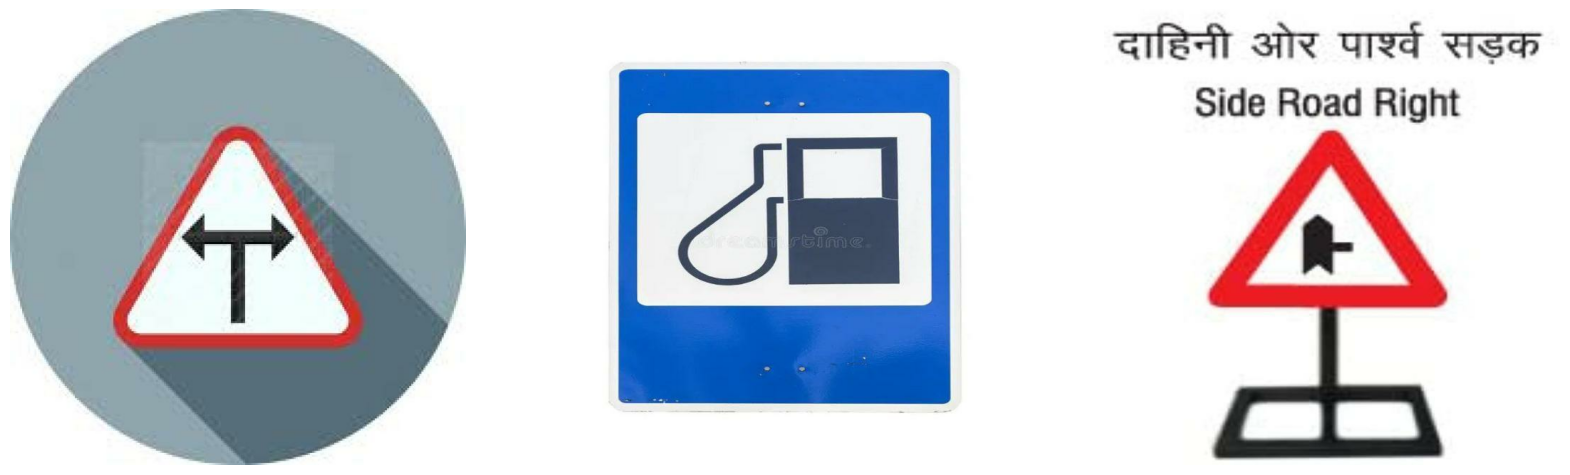

In [24]:
input_image_size = (HEIGHT, WIDTH)
plt.figure(figsize=(20, 20))
min_score_thresh = 0.30 # Change minimum score for threshold to see all bounding boxes confidences.

for i, serialized_example in enumerate(test_ds):
  plt.subplot(1, 3, i+1)
  decoded_tensors = tf_ex_decoder.decode(serialized_example)
  image = build_inputs_for_object_detection(decoded_tensors['image'], input_image_size)
  image = tf.expand_dims(image, axis=0)
  image = tf.cast(image, dtype = tf.uint8)
  image_np = image[0].numpy()
  result = model_fn(image)
  visualization_utils.visualize_boxes_and_labels_on_image_array(
      image_np,
      result['detection_boxes'][0].numpy(),
      result['detection_classes'][0].numpy().astype(int),
      result['detection_scores'][0].numpy(),
      category_index=category_index,
      use_normalized_coordinates=False,
      max_boxes_to_draw=200,
      min_score_thresh=min_score_thresh,
      agnostic_mode=False,
      instance_masks=None,
      line_thickness=4)
  plt.imshow(image_np)
  plt.axis('off')

plt.show()